In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from imblearn.combine import *
from imblearn.combine import *
from sklearn.metrics import classification_report
from imblearn.under_sampling import TomekLinks
from imblearn.combine import SMOTETomek
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import LeaveOneOut
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.model_selection import GridSearchCV
from sklearn.dummy import DummyClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import mean_squared_error
import xgboost as xgb
from xgboost import XGBClassifier
from xgboost import plot_importance
from sklearn.metrics import confusion_matrix
from lightgbm import LGBMClassifier
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from bayes_opt import BayesianOptimization
from lightgbm import LGBMRegressor
from sklearn.preprocessing import Binarizer
from sklearn.impute import SimpleImputer

In [2]:
human_train = pd.read_csv("work/human.csv", encoding="cp949")
human_new = pd.read_csv("work/human_new.csv", encoding="cp949")

In [3]:
# human_train

In [4]:
# human_train.info()

In [5]:
# human_train.isnull().sum()

In [6]:
# human_train["노동 계급"].value_counts()

In [7]:
# human_train["학력"].value_counts()

In [8]:
# human_train["혼인 상태"].value_counts()

In [9]:
# human_train["직업"].value_counts()

In [10]:
# human_train["관계"].value_counts()

In [11]:
# human_train["인종"].value_counts()

In [12]:
# human_train["모국"].value_counts()

In [13]:
# human_train["교육 수"].value_counts()

In [14]:
# human_train["자본 이득"].value_counts()

In [15]:
#  human_train["자본 손실"].value_counts()

In [16]:
# human_train["주당 시간"].value_counts()

# Null값 제거

In [3]:
# human_train.dropna(subset=["노동 계급","직업","모국"],inplace=True)
# human_train

imputer_con = SimpleImputer(strategy="most_frequent")  
imputer_con.fit(human_train[["노동 계급","직업","모국"]])
x = imputer_con.transform(human_train[["노동 계급","직업","모국"]])
human_train[["노동 계급","직업","모국"]] = x

# 성별 수치형으로 변환

In [3]:
human_train[["성별"]] = human_train[["성별"]].apply(lambda x: x.str.lstrip())
human_train[["성별"]] = human_train[["성별"]].apply(lambda x: x.astype('category').cat.codes)

In [40]:
# human_train["성별"] = human_train["성별"].str.strip()

In [41]:
# gender = {"Male":1, "Female":0}
# human_train["성별"] = human_train["성별"].map(gender)

In [42]:
human_train["성별"].value_counts()

1    21790
0    10771
Name: 성별, dtype: int64

In [46]:
human_train.isnull().sum()

아이디       0
나이        0
노동 계급     0
fnlwgt    0
학력        0
교육 수      0
혼인 상태     0
직업        0
관계        0
인종        0
성별        0
자본 이득     0
자본 손실     0
주당 시간     0
모국        0
dtype: int64

# 아웃라이어 제거

In [14]:
def remove_outlier_test(d_cp, column):
    fraud_column_data = d_cp[column]
    quan_25 = np.percentile(fraud_column_data.values, 25)
    quan_75 = np.percentile(fraud_column_data.values, 75)
    iqr = quan_75 - quan_25
    lowest = quan_25 - iqr
    highest = quan_75 + iqr
    outlier_index = fraud_column_data[(fraud_column_data < lowest)|(fraud_column_data > highest)].index
    print(len(outlier_index))
    d_cp.drop(outlier_index, axis=0, inplace=True)
    print(d_cp.shape)
    
    return d_cp

In [15]:
remove_outlier_test(human_train, '나이') #0.93325
#remove_outlier_test(human_train, 'fnlwgt') #0.93404
#remove_outlier_test(human_train, '주당 시간') #0.93466 
remove_outlier_test(human_train, '교육 수')
#아래 두개 빼고 하면 0.93358
#remove_outlier_test(human_train, '자본 이득')
#remove_outlier_test(human_train, '자본 손실')
#다했을때 0.93281
#나이,교육 수만 했을때 0.93510
#remove_outlier_test(human_train, '학력') #나이 교육수 학력 0.93474

737
(31824, 115)
1987
(29837, 115)


,아이디,나이,노동 계급,fnlwgt,학력,교육 수,혼인 상태,직업,관계,인종,...,Portugal,Puerto-Rico,Scotland,South,Taiwan,Thailand,Trinadad&Tobago,United-States,Vietnam,Yugoslavia
0,H20001,39,6,77516,9,13,4,0,1,4,...,0,0,0,0,0,0,0,1,0,0
1,H20002,50,5,83311,9,13,2,3,0,4,...,0,0,0,0,0,0,0,1,0,0
2,H20003,38,3,215646,11,9,0,5,1,4,...,0,0,0,0,0,0,0,1,0,0
3,H20004,53,3,234721,1,7,2,5,0,2,...,0,0,0,0,0,0,0,1,0,0
4,H20005,28,3,338409,9,13,2,9,5,2,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,H52557,27,3,257302,7,12,2,12,5,4,...,0,0,0,0,0,0,0,1,0,0
32557,H52558,40,3,154374,11,9,2,6,0,4,...,0,0,0,0,0,0,0,1,0,0
32558,H52559,58,3,151910,11,9,6,0,4,4,...,0,0,0,0,0,0,0,1,0,0
32559,H52560,22,3,201490,11,9,4,0,3,4,...,0,0,0,0,0,0,0,1,0,0


In [10]:
#remove_outlier_test(human_train, 'fnlwgt')
# 0 -> 0.91771 1-> 0.91945
#remove_outlier_test(human_train, '주당 시간')
# 0 -> 0.88918 1->0.90873

In [11]:
# for i, v in enumerate(human_train['나이']):
#     if v>79 :
#         human_train['나이'].replace(v,79,inplace=True)

In [18]:
# for i, v in enumerate(human_train['fnlwgt']):
#     if v>410000 :
#         human_train['fnlwgt'].replace(v,410000,inplace=True)

In [19]:
# for i, v in enumerate(human_train['주당 시간']):
#     if v>53 :
#         human_train['주당 시간'].replace(v,53,inplace=True)
# for i, v in enumerate(human_train['주당 시간']):
#     if v<32 :
#         human_train['주당 시간'].replace(v,32,inplace=True)

In [20]:
# for i, v in enumerate(human_train['교육 수']):
#     if v<4:
#         human_train['교육 수'].replace(v,4,inplace=True)

# 파생 변수 만들기

In [4]:
s1=human_train['자본 이득']
s2=human_train['자본 손실']
s=s1+s2
s.rename("순이익",inplace=True)
human_train = pd.concat([human_train,s],axis=1)

In [5]:
human_train['나이대'] = (human_train['나이']/10).astype(int)
human_train['주당 시간별'] = (human_train['주당 시간']/10).astype(int)
human_train['fnlwgt2'] = (human_train['fnlwgt']/10000).astype(int)

In [6]:
working_class = pd.get_dummies(human_train["노동 계급"])
human_train = pd.concat([human_train, working_class], axis=1)
# human_train.drop("노동 계급", axis=1, inplace=True)

human_train[["노동 계급"]] = human_train[["노동 계급"]].apply(lambda x: x.str.lstrip())
human_train[["노동 계급"]] = human_train[["노동 계급"]].apply(lambda x: x.astype('category').cat.codes)

In [7]:
academic_ability = pd.get_dummies(human_train["학력"])
human_train = pd.concat([human_train,academic_ability],axis=1)
# human_train.drop("학력",axis=1,inplace=True)

human_train[["학력"]] = human_train[["학력"]].apply(lambda x: x.str.lstrip())
human_train[["학력"]] = human_train[["학력"]].apply(lambda x: x.astype('category').cat.codes)

In [8]:
marital_status = pd.get_dummies(human_train["혼인 상태"])
human_train = pd.concat([human_train,marital_status], axis=1)
# human_train.drop("혼인 상태", axis=1, inplace=True)

human_train[["혼인 상태"]] = human_train[["혼인 상태"]].apply(lambda x: x.str.lstrip())
human_train[["혼인 상태"]] = human_train[["혼인 상태"]].apply(lambda x: x.astype('category').cat.codes)

In [9]:
jobs = pd.get_dummies(human_train["직업"])
human_train = pd.concat([human_train, jobs], axis=1)
# human_train.drop("직업", axis=1, inplace=True)

human_train[["직업"]] = human_train[["직업"]].apply(lambda x: x.str.lstrip())
human_train[["직업"]] = human_train[["직업"]].apply(lambda x: x.astype('category').cat.codes)
human_train.isnull().sum()

아이디                  0
나이                   0
노동 계급                0
fnlwgt               0
학력                   0
                    ..
 Prof-specialty      0
 Protective-serv     0
 Sales               0
 Tech-support        0
 Transport-moving    0
Length: 64, dtype: int64

In [10]:
relationship = pd.get_dummies(human_train["관계"])
human_train = pd.concat([human_train, relationship], axis=1)
# human_train.drop("관계", axis=1, inplace=True)

human_train[["관계"]] = human_train[["관계"]].apply(lambda x: x.str.lstrip())
human_train[["관계"]] = human_train[["관계"]].apply(lambda x: x.astype('category').cat.codes)

In [11]:
race = pd.get_dummies(human_train["인종"])
human_train = pd.concat([human_train, race], axis=1)
# human_train.drop("인종", axis=1, inplace=True)

human_train[["인종"]] = human_train[["인종"]].apply(lambda x: x.str.lstrip())
human_train[["인종"]] = human_train[["인종"]].apply(lambda x: x.astype('category').cat.codes)

In [12]:
homeland = pd.get_dummies(human_train["모국"])
human_train = pd.concat([human_train, homeland], axis=1)
# human_train.drop("모국", axis=1, inplace=True)

human_train[["모국"]] = human_train[["모국"]].apply(lambda x: x.str.lstrip())
human_train[["모국"]] = human_train[["모국"]].apply(lambda x: x.astype('category').cat.codes)

In [24]:
human_train.drop(["자본 이득","자본 손실","순이익"],axis=1,inplace=True)

In [13]:
human_train.drop([" Holand-Netherlands"],axis=1,inplace=True)

나이            AxesSubplot(0.125,0.816017;0.352273x0.0639831)
노동 계급      AxesSubplot(0.547727,0.816017;0.352273x0.0639831)
fnlwgt        AxesSubplot(0.125,0.739237;0.352273x0.0639831)
학력         AxesSubplot(0.547727,0.739237;0.352273x0.0639831)
교육 수          AxesSubplot(0.125,0.662458;0.352273x0.0639831)
혼인 상태      AxesSubplot(0.547727,0.662458;0.352273x0.0639831)
직업            AxesSubplot(0.125,0.585678;0.352273x0.0639831)
관계         AxesSubplot(0.547727,0.585678;0.352273x0.0639831)
인종            AxesSubplot(0.125,0.508898;0.352273x0.0639831)
성별         AxesSubplot(0.547727,0.508898;0.352273x0.0639831)
주당 시간         AxesSubplot(0.125,0.432119;0.352273x0.0639831)
모국         AxesSubplot(0.547727,0.432119;0.352273x0.0639831)
나이대           AxesSubplot(0.125,0.355339;0.352273x0.0639831)
주당 시간별     AxesSubplot(0.547727,0.355339;0.352273x0.0639831)
fnlwgt2       AxesSubplot(0.125,0.278559;0.352273x0.0639831)
dtype: object

C:\Users\020\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\020\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


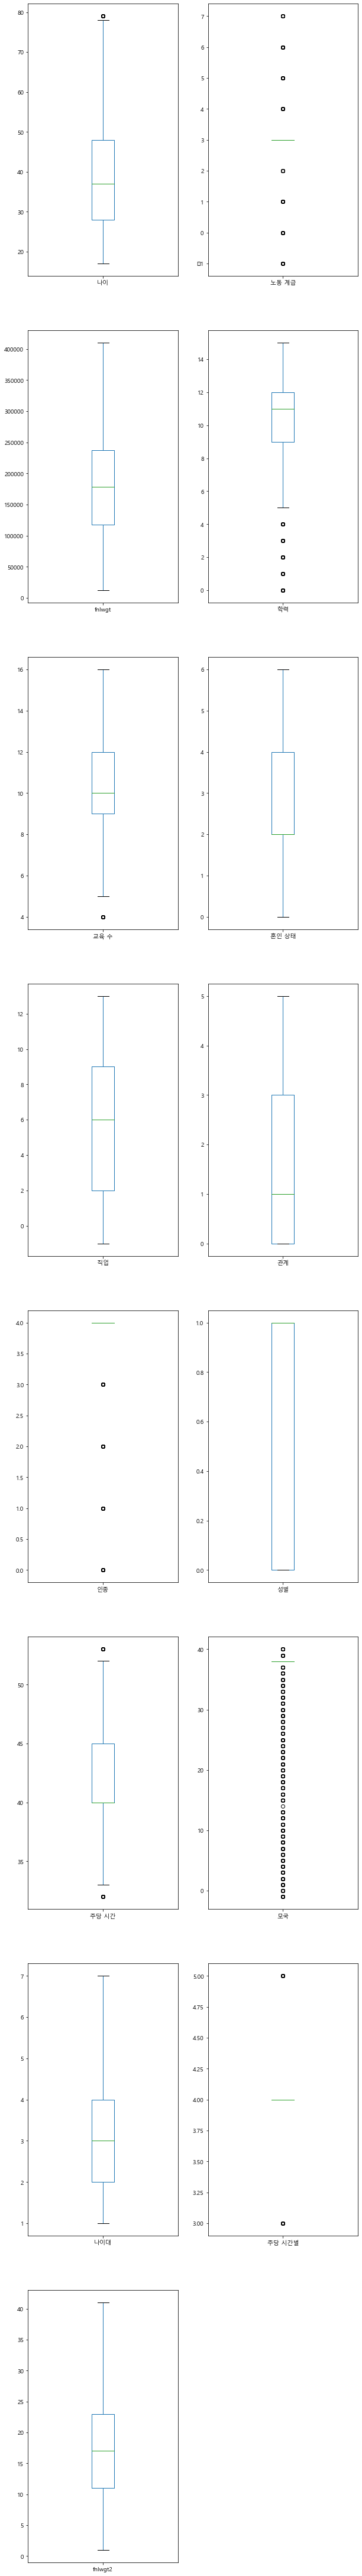

In [27]:
plt.rcParams['figure.figsize'] = [50, 50]
plt.rc('font', family='Malgun Gothic')
human_train.loc[:, '나이':'fnlwgt2'].plot.box(subplots=True, layout=(10,2), figsize=(10,100))

{'whiskers': [<matplotlib.lines.Line2D at 0x1a90b5bceb0>,
 'caps': [<matplotlib.lines.Line2D at 0x1a90b8565b0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1a90b5bc5e0>,
 'medians': [<matplotlib.lines.Line2D at 0x1a90b856c70>,
 'fliers': [<matplotlib.lines.Line2D at 0x1a90b856fd0>,
 'means': []}

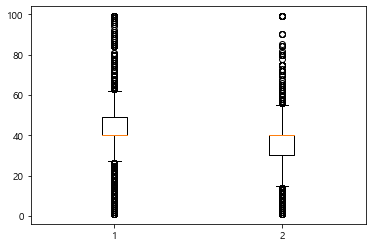

In [14]:
plt.rc('font', family='Malgun Gothic')
#human_train.loc[:, '주당 시간별'].plot.box(subplots=True, layout=(1,1), figsize=(5,10))
gender_male = human_train[human_train['성별']==1]
gender_female = human_train[human_train['성별']==0]
gender = [gender_male['주당 시간'], gender_female['주당 시간']]
plt.boxplot(gender)

In [22]:
human_train.loc[:,'주당 시간별'].describe().T

count    30718.000000
mean         3.924311
std          1.189654
min          0.000000
25%          4.000000
50%          4.000000
75%          4.000000
max          7.000000
Name: 주당 시간별, dtype: float64

In [37]:
human_train.loc[:,'주당 시간별'].value_counts()

4    17583
5     3799
3     3374
2     2088
6     1760
1     1063
7      435
0      294
8      189
9      133
Name: 주당 시간별, dtype: int64

In [18]:
human_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Columns: 112 entries, 아이디 to  Yugoslavia
dtypes: int32(3), int64(4), int8(8), object(1), uint8(96)
memory usage: 4.8+ MB


In [35]:
human_train.corr().성별.sort_values(ascending=False)

성별                     1.000000
 Husband               0.580135
 Married-civ-spouse    0.431805
주당 시간별                 0.240200
주당 시간                  0.236223
                         ...   
 Divorced             -0.228621
 Adm-clerical         -0.263148
 Wife                 -0.319311
 Unmarried            -0.321273
관계                    -0.582454
Name: 성별, Length: 112, dtype: float64

In [13]:
human_train.isnull().sum().sum()

583

# 데이터 나누기

In [16]:
htX = human_train.drop(["아이디","성별"], axis=1)
htY = human_train["성별"]

In [17]:
X_train, X_test, Y_train, Y_test = train_test_split(htX, htY, test_size=0.25, random_state=0)

In [19]:
htX.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29837 entries, 0 to 32560
Columns: 107 entries, 나이 to  Yugoslavia
dtypes: int32(3), int64(7), int8(7), uint8(90)
memory usage: 4.9 MB


# Normalization

In [22]:
 human_train_x=human_train.loc[:,['주당 시간','주당 시간별','나이','나이대','fnlwgt','fnlwgt2','교육 수']]
#human_train_x=human_train.loc[:,['주당 시간','나이','fnlwgt','교육 수']]

In [26]:
scaler = MinMaxScaler()
scaler.fit(human_train_x)

MinMaxScaler()

In [27]:
x = scaler.transform(human_train_x)
human_train_x = pd.DataFrame(x, columns = human_train_x.columns)

In [28]:
human_train_x.describe().T

,count,mean,std,min,25%,50%,75%,max
주당 시간,32561.0,0.402423,0.125994,0.0,0.397959,0.397959,0.448980,1.0
주당 시간별,32561.0,0.431802,0.141968,0.0,0.444444,0.444444,0.444444,1.0
나이,32561.0,0.295639,0.186855,0.0,0.150685,0.273973,0.424658,1.0
나이대,32561.0,0.301319,0.174978,0.0,0.125000,0.250000,0.375000,1.0
fnlwgt,32561.0,0.120545,0.071685,0.0,0.071679,0.112788,0.152651,1.0
fnlwgt2,32561.0,0.118875,0.071810,0.0,0.068027,0.108844,0.149660,1.0
교육 수,32561.0,0.605379,0.171515,0.0,0.533333,0.600000,0.733333,1.0


# Standardization

In [17]:
scaler = StandardScaler()
scaler.fit(human_train_x)
x = scaler.transform(human_train_x)
human_train_x = pd.DataFrame(x, columns=human_train_x.columns)

In [18]:
human_train_x.describe().T

,count,mean,std,min,25%,50%,75%,max
주당 시간,32561.0,5.995645e-16,1.000015,-3.194030,-0.035429,-0.035429,0.369519,4.742967
주당 시간별,32561.0,-3.671193e-16,1.000015,-3.041598,0.089056,0.089056,0.089056,4.002374
나이,32561.0,-1.737807e-16,1.000015,-1.582206,-0.775768,-0.115955,0.690484,3.769612
나이대,32561.0,-1.043714e-15,1.000015,-1.722064,-1.007678,-0.293293,0.421093,3.993020
fnlwgt,32561.0,-8.840254e-17,1.000015,-1.681631,-0.681691,-0.108219,0.447877,12.268563
fnlwgt2,32561.0,1.429777e-16,1.000015,-1.655440,-0.708104,-0.139702,0.428700,12.270406
교육 수,32561.0,2.312098e-17,1.000015,-3.529656,-0.420060,-0.031360,0.746039,2.300838


In [29]:
human_train.drop(['주당 시간','주당 시간별','나이','나이대','fnlwgt','fnlwgt2','교육 수'],axis=1,inplace=True)
#human_train.drop(['주당 시간','나이','fnlwgt','교육 수'],axis=1,inplace=True)

In [30]:
human_train = pd.concat([human_train,human_train_x],axis=1)

In [31]:
human_train.isnull().sum()

아이디        0
노동 계급      0
학력         0
혼인 상태      0
직업         0
          ..
나이         0
나이대        0
fnlwgt     0
fnlwgt2    0
교육 수       0
Length: 115, dtype: int64

In [32]:
human_train.dropna(inplace=True)
human_train.isnull().sum()

아이디        0
노동 계급      0
학력         0
혼인 상태      0
직업         0
          ..
나이         0
나이대        0
fnlwgt     0
fnlwgt2    0
교육 수       0
Length: 109, dtype: int64

# 샘플링

### 통합 샘플링

In [18]:
tree3 = DecisionTreeClassifier(max_depth=10, random_state=0)
tree3.fit(X_train, Y_train)
pred_tree3 = tree3.predict(X_test);

print(classification_report(Y_test, pred_tree3))

              precision    recall  f1-score   support

           0       0.76      0.72      0.74      2530
           1       0.86      0.88      0.87      4930

    accuracy                           0.83      7460
   macro avg       0.81      0.80      0.80      7460
weighted avg       0.82      0.83      0.82      7460



In [19]:
htX, htY = SMOTETomek(random_state=0).fit_sample(X_train, Y_train)

In [20]:
tree3 = DecisionTreeClassifier(max_depth=20, random_state=0)
tree3.fit(htX, htY)
pred_tree3 = tree3.predict(X_test)

print(classification_report(Y_test, pred_tree3))

# (precision) 0 이라고 예측한 데이터의 74%만 실제로 0
# (precision) 1 이라고 예측한 데이터의 33%만 실제로 1
# (recall) 실제 0인 데이터중 56%만 0으로 판별됨 
# (recall) 실제 1인 데이타중 52%만 1로 판별됨

              precision    recall  f1-score   support

           0       0.71      0.77      0.74      2530
           1       0.88      0.83      0.86      4930

    accuracy                           0.81      7460
   macro avg       0.79      0.80      0.80      7460
weighted avg       0.82      0.81      0.82      7460



### 언더 샘플링 / 오버 샘플링

In [21]:
aX = np.array(htX)
aY = np.array(htY)
print(np.sum(aY == 1), np.sum(aY == 0))

13228 13228


In [27]:
#sampler = RandomUnderSampler(random_state=1)
sampler = RandomOverSampler(random_state=1)
aX, aY = sampler.fit_resample(aX, aY)

In [22]:
print(np.sum(aY == 1), np.sum(aY == 0))

19804 10033


# Cross-Validation

In [30]:
#model = KNeighborsClassifier()
#model = LogisticRegression()
model = DecisionTreeClassifier()
# kf = StratifiedKFold(n_splits=10, shuffle=True)

In [31]:
scores = cross_val_score(model, htX, htY)
scores

array([0.79524129, 0.80663539, 0.80610022, 0.79654768, 0.7962125 ])

In [32]:
print("Mean: {:.3f}\nStd: {:.3f}\nMin: {:.3f}\nMax: {:.3f}".format(
    scores.mean(), scores.std(), scores.min(), scores.max()))

Mean: 0.800
Std: 0.005
Min: 0.795
Max: 0.807


# K-Fold 교차검증

In [33]:
kf = KFold(n_splits=10, shuffle=True)
# kf = LeaveOneOut()
kf

KFold(n_splits=10, random_state=None, shuffle=True)

In [34]:
scores = []

for train_id, test_id in kf.split(aX):
    x = aX[train_id]
    y = aY[train_id]
    clf = tree.DecisionTreeClassifier()
    clf.fit(x,y)
    pred_y = clf.predict(aX[test_id])
    score = accuracy_score(aY[test_id], pred_y)
    scores.append(score)

scores = np.array(scores)
print(scores.mean(), scores.std(), scores.max(), scores.min())
print(recall_score(aY[test_id], pred_y))
print(precision_score(aY[test_id], pred_y))

0.8032642638040945 0.00722545288032349 0.8123324396782842 0.7877975192758967
0.8392217101894521
0.8370786516853933


In [35]:
dtrain = xgb.DMatrix(data=htX, label=htY)
dtest = xgb.DMatrix(data=X_test, label=Y_test)

In [35]:
# params = {
#     'criterion': ['entropy'],    
#     'max_depth': [2, 4, 6, 8, 10],
#     'min_samples_leaf': [10, 20, 30, 40, 50],
# }

params = {
#      'learning_rate': [0.05]
#      ,'nestimators': [1000]
#      ,'max_depth': [10, 15, 20]
#     ,'num_leaves' : [100,500,1000]
#     ,'objective' : ['binary','mae','mse']
#     ,'boosting' : ['gbdt','dart','goss']
    'eta':[0.01,0.05,0.1]
     ,'n_estimators':[100,500,1000]
      ,'max_depth':[3,6,10]
#     ,'max_leaves' : [100,500,1000] 
     ,'booster' : ['gbtree']
    ,'objective': ['binary:logistic']
     ,'eval_metric':['logloss']
    
}

In [36]:
lgbm_wrapper = LGBMClassifier()
xgbb =XGBClassifier()

In [37]:
# clf_gs = GridSearchCV(tree.DecisionTreeClassifier(), params, 
#                 cv=KFold(n_splits=10, shuffle=True), scoring='accuracy')
clf_gs = GridSearchCV(estimator=xgbb, param_grid=params, 
                cv=KFold(n_splits=10, shuffle=True), scoring='accuracy')

In [38]:
clf_gs.fit(X_train, Y_train)

C:\Users\020\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


GridSearchCV(cv=KFold(n_splits=10, random_state=None, shuffle=True),
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, m...
                                     num_parallel_tree=None, random_state=None,
                                     reg_alpha=None, reg_lambda=None,
                                     scale_pos_weight=None, subsample=None,
                                     tree_method=None, validate_parameters=None,
             

In [39]:
print(clf_gs.best_score_)
print(clf_gs.best_params_)

0.8473434036312677
{'booster': 'gbtree', 'eta': 0.1, 'eval_metric': 'logloss', 'max_depth': 6, 'n_estimators': 500, 'objective': 'binary:logistic'}


In [150]:
tree1 = DecisionTreeClassifier(max_depth=10, min_samples_leaf=30, random_state=0)
tree1.fit(aX, aY).score(aX[test_id], aY[test_id])

0.8815697266993693

In [22]:
print(Y_test.value_counts())
dummy=DummyClassifier(strategy='most_frequent').fit(aX, aY)
dummy.score(X_test, Y_test)

1    4930
0    2530
Name: 성별, dtype: int64


0.339142091152815

In [48]:
svm = SVC(random_state=0)
svm.fit(htX, htY)

SVC(random_state=0)

In [49]:
mlp=MLPClassifier()
mlp.fit(htX, htY)

C:\Users\020\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier()

In [50]:
display(svm.score(htX, htY))
display(svm.score(X_test, Y_test))

0.8444338725023787

0.7733693649428817

In [51]:
display(mlp.score(htX, htY))
display(mlp.score(X_test, Y_test))

0.9244211861718997

0.8334356958604594

# xgboost

In [23]:
dtrain = xgb.DMatrix(data=htX, label=htY)
dtest = xgb.DMatrix(data=X_test, label=Y_test)

In [24]:
params = {'max_depth':3,
          'eta':0.1,
          'objective':'binary:logistic',
          'eval_metric':'logloss',
          'early_stoppings':100
         }
num_rounds = 400

In [25]:
# train 데이터 세트는 'train', evaluation(test) 데이터 세트는 'eval'로 명기
wlist = [(dtrain, 'train'),(dtest, 'eval')]
# 하이퍼 파라미터와 early stoppinig 파라미터를 train() 함수의 파라미터로 전달
xgb_model = xgb.train(params=params, dtrain=dtrain, num_boost_round=num_rounds, evals=wlist)

[14:06:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { early_stoppings } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	train-logloss:0.64160	eval-logloss:0.64616
[1]	train-logloss:0.59911	eval-logloss:0.60732
[2]	train-logloss:0.56373	eval-logloss:0.57599
[3]	train-logloss:0.53358	eval-logloss:0.54891
[4]	train-logloss:0.50812	eval-logloss:0.52634
[5]	train-logloss:0.48377	eval-logloss:0.50594
[6]	train-logloss:0.46463	eval-logloss:0.48869
[7]	train-logloss:0.44584	eval-logloss:0.47273
[8]	train-logloss:0.43033	eval-logloss:0.45990
[9]	train-logloss:0.41720	eval-logloss:0.44804
[10]	train-logloss:0.40386	eval-logloss:0.43732
[11]	train-logloss:0.39346	eval-logloss:0.42801
[12]	train-logloss:0.38348	eval-logloss:0

[162]	train-logloss:0.22736	eval-logloss:0.30502
[163]	train-logloss:0.22726	eval-logloss:0.30498
[164]	train-logloss:0.22701	eval-logloss:0.30474
[165]	train-logloss:0.22688	eval-logloss:0.30474
[166]	train-logloss:0.22673	eval-logloss:0.30465
[167]	train-logloss:0.22644	eval-logloss:0.30466
[168]	train-logloss:0.22635	eval-logloss:0.30465
[169]	train-logloss:0.22623	eval-logloss:0.30474
[170]	train-logloss:0.22611	eval-logloss:0.30462
[171]	train-logloss:0.22600	eval-logloss:0.30460
[172]	train-logloss:0.22581	eval-logloss:0.30447
[173]	train-logloss:0.22565	eval-logloss:0.30435
[174]	train-logloss:0.22551	eval-logloss:0.30429
[175]	train-logloss:0.22536	eval-logloss:0.30416
[176]	train-logloss:0.22521	eval-logloss:0.30414
[177]	train-logloss:0.22509	eval-logloss:0.30420
[178]	train-logloss:0.22483	eval-logloss:0.30404
[179]	train-logloss:0.22470	eval-logloss:0.30397
[180]	train-logloss:0.22449	eval-logloss:0.30391
[181]	train-logloss:0.22431	eval-logloss:0.30384
[182]	train-logloss:

[330]	train-logloss:0.20969	eval-logloss:0.30120
[331]	train-logloss:0.20962	eval-logloss:0.30122
[332]	train-logloss:0.20958	eval-logloss:0.30128
[333]	train-logloss:0.20955	eval-logloss:0.30129
[334]	train-logloss:0.20945	eval-logloss:0.30128
[335]	train-logloss:0.20939	eval-logloss:0.30126
[336]	train-logloss:0.20933	eval-logloss:0.30125
[337]	train-logloss:0.20925	eval-logloss:0.30128
[338]	train-logloss:0.20919	eval-logloss:0.30122
[339]	train-logloss:0.20912	eval-logloss:0.30117
[340]	train-logloss:0.20909	eval-logloss:0.30120
[341]	train-logloss:0.20905	eval-logloss:0.30119
[342]	train-logloss:0.20902	eval-logloss:0.30122
[343]	train-logloss:0.20898	eval-logloss:0.30123
[344]	train-logloss:0.20894	eval-logloss:0.30122
[345]	train-logloss:0.20888	eval-logloss:0.30125
[346]	train-logloss:0.20884	eval-logloss:0.30125
[347]	train-logloss:0.20878	eval-logloss:0.30126
[348]	train-logloss:0.20873	eval-logloss:0.30125
[349]	train-logloss:0.20868	eval-logloss:0.30126
[350]	train-logloss:

In [26]:
pred_probs = xgb_model.predict(dtest)
print(np.round(pred_probs[:10], 3))

preds = [1 if x > 0.5 else 0 for x in pred_probs]

[1.    0.074 0.182 0.06  0.901 1.    1.    0.999 0.493 1.   ]


In [27]:
def get_clf_eval(Y_test, pred):
    confusion = confusion_matrix(Y_test, pred)
    accuracy = accuracy_score(Y_test, pred)
    precision = precision_score(Y_test, pred)
    recall = recall_score(Y_test, pred)
    print('오차행렬')
    print(confusion)
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f}'.format(accuracy, precision, recall))

In [28]:
get_clf_eval(Y_test, preds)

오차행렬
[[2095  435]
 [ 730 4200]]
정확도: 0.8438, 정밀도: 0.9061, 재현율: 0.8519


<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

C:\Users\020\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 49692 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\020\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 51060 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\020\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 51061 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\020\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 51088 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\020\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 48376 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\020\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 49552 missing from current font.

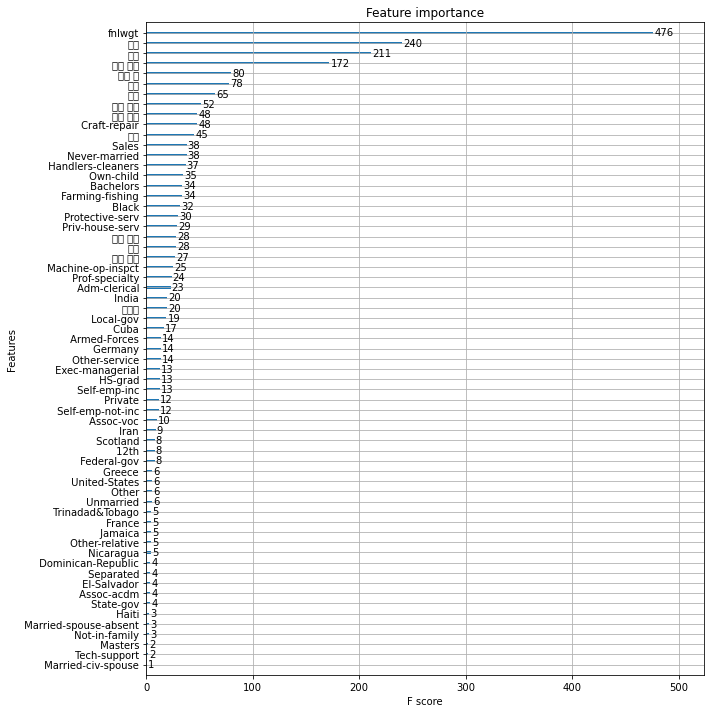

In [36]:
from xgboost import plot_importance

flg, ax = plt.subplots(figsize=(10, 12))
plot_importance(xgb_model, ax=ax)

# LightGBM

In [38]:
lgbm_wrapper = LGBMClassifier(learning_rate= 0.05,max_depth= 20,
                              nestimators=1000, objective = 'mse',
                              boosting='dart'
                                ,num_leaves=100
#                               ,min_data_in_leaf=200
                             )
evals = [(X_test, Y_test)]
lgbm_wrapper.fit(htX, htY, early_stopping_rounds=100, 
                 eval_metric="logloss", eval_set=evals, verbose=True)
pred = lgbm_wrapper.predict(X_test)

[1]	valid_0's binary_logloss: 0.613174	valid_0's l2: 0.211872
[2]	valid_0's binary_logloss: 0.588728	valid_0's l2: 0.20082
[3]	valid_0's binary_logloss: 0.56661	valid_0's l2: 0.19081
[4]	valid_0's binary_logloss: 0.546465	valid_0's l2: 0.181727
[5]	valid_0's binary_logloss: 0.528199	valid_0's l2: 0.173554
[6]	valid_0's binary_logloss: 0.511356	valid_0's l2: 0.166097
[7]	valid_0's binary_logloss: 0.496029	valid_0's l2: 0.159405
[8]	valid_0's binary_logloss: 0.502486	valid_0's l2: 0.162211
[9]	valid_0's binary_logloss: 0.487825	valid_0's l2: 0.155865
[10]	valid_0's binary_logloss: 0.474223	valid_0's l2: 0.15007
[11]	valid_0's binary_logloss: 0.461658	valid_0's l2: 0.144816
[12]	valid_0's binary_logloss: 0.466564	valid_0's l2: 0.14685
[13]	valid_0's binary_logloss: 0.454436	valid_0's l2: 0.141825
[14]	valid_0's binary_logloss: 0.44329	valid_0's l2: 0.137313
[15]	valid_0's binary_logloss: 0.432958	valid_0's l2: 0.133224
[16]	valid_0's binary_logloss: 0.423372	valid_0's l2: 0.129519
[17]	va

C:\Users\020\anaconda3\lib\site-packages\lightgbm\callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')



[30]	valid_0's binary_logloss: 0.350658	valid_0's l2: 0.104959
[31]	valid_0's binary_logloss: 0.352138	valid_0's l2: 0.105353
[32]	valid_0's binary_logloss: 0.347638	valid_0's l2: 0.104094
[33]	valid_0's binary_logloss: 0.343442	valid_0's l2: 0.102953
[34]	valid_0's binary_logloss: 0.339395	valid_0's l2: 0.101848
[35]	valid_0's binary_logloss: 0.342336	valid_0's l2: 0.102599
[36]	valid_0's binary_logloss: 0.347403	valid_0's l2: 0.103929
[37]	valid_0's binary_logloss: 0.343116	valid_0's l2: 0.102741
[38]	valid_0's binary_logloss: 0.339057	valid_0's l2: 0.101647
[39]	valid_0's binary_logloss: 0.335203	valid_0's l2: 0.100618
[40]	valid_0's binary_logloss: 0.335061	valid_0's l2: 0.100547
[41]	valid_0's binary_logloss: 0.338429	valid_0's l2: 0.101381
[42]	valid_0's binary_logloss: 0.334743	valid_0's l2: 0.100441
[43]	valid_0's binary_logloss: 0.337594	valid_0's l2: 0.101154
[44]	valid_0's binary_logloss: 0.333903	valid_0's l2: 0.100198
[45]	valid_0's binary_logloss: 0.330431	valid_0's l2: 

In [39]:
get_clf_eval(Y_test, pred)

오차행렬
[[2358  172]
 [ 907 4023]]
정확도: 0.8554, 정밀도: 0.9590, 재현율: 0.8160


In [40]:
# import lightgbm as lgb
# lgbm_wrapper = LGBMClassifier(nestimators=1000,learning_rate=0.1)
# def modelFitter(colsampleByTree, subsample,maxDepth, num_leaves):   
#     model = lgb.LGBMRegressor(learning_rate=0.02, n_estimators=10000, max_depth=maxDepth.astype("int32"), subsample=subsample, colsample_bytree=colsampleByTree,num_leaves=num_leaves.astype("int32"))
#     evalSet  = [(X_test, Y_test)]
#     model.fit(htX, htY, eval_metric="rmse", eval_set=evals, early_stopping_rounds=50, verbose=False)
#     bestScore = model.best_score_[list(model.best_score_.keys())[0]]['rmse']
#     return -bestScore
# # Bounded region of parameter space
# pbounds = {'colsampleByTree': (0.8,1.0), 'subsample': (0.8,1.0), 'maxDepth': (2,5), 'num_leaves': (24, 45)}
# optimizer = BayesianOptimization(
#     f=modelFitter,
#     pbounds=pbounds,
#     random_state=1)
# optimizer.maximize(init_points=5,n_iter=5)  #n_iter=bayesian, init_points=random

# PR curve

In [29]:
def plot_precision_recall_curve(precisions, recalls) :
    plt.plot(recalls, precisions, color='blue')
    plt.axis([0,1,0,1])
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('PR curve')

In [30]:
xgb_model.predict(X_test_ndf)

NameError: name 'X_test_ndf' is not defined

In [32]:
X_test_ndf= xgb.DMatrix(data=X_test.iloc[:, 0:])

In [33]:
X_test

,나이,노동 계급,fnlwgt,학력,교육 수,혼인 상태,직업,관계,인종,자본 이득,...,Portugal,Puerto-Rico,Scotland,South,Taiwan,Thailand,Trinadad&Tobago,United-States,Vietnam,Yugoslavia
817,56,3,186556,15,10,2,2,0,4,0,...,0,0,0,0,0,0,0,1,0,0
12466,48,3,172709,11,9,0,7,4,2,0,...,0,0,0,0,0,0,0,1,0,0
2634,66,-1,112871,1,7,4,-1,1,4,0,...,0,0,0,0,0,0,0,1,0,0
20875,43,3,110556,11,9,5,3,4,2,0,...,0,0,0,0,0,0,0,1,0,0
5092,38,3,172571,15,10,0,2,3,4,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30495,43,0,25005,12,14,2,5,0,4,5013,...,0,0,0,0,0,0,0,1,0,0
20751,36,3,177907,15,10,2,6,0,4,0,...,0,0,0,0,0,0,0,1,0,0
9796,39,3,74194,11,9,2,3,0,4,0,...,0,0,0,0,0,0,0,1,0,0
8744,22,1,134181,11,9,4,5,2,4,0,...,0,0,0,0,0,0,0,1,0,0


In [34]:
lgbm_wrapper.predict_proba(X_test)

NameError: name 'lgbm_wrapper' is not defined

In [35]:
precisions, recalls, _ = precision_recall_curve(Y_test, 
                                    xgb_model.predict(X_test_ndf))

In [36]:
precisions

array([0.6952475 , 0.69520451, 0.69530258, ..., 1.        , 1.        ,
       1.        ])

In [37]:
recalls

array([1.00000000e+00, 9.99797160e-01, 9.99797160e-01, ...,
       4.05679513e-04, 2.02839757e-04, 0.00000000e+00])

In [38]:
_

array([0.01352556, 0.0135593 , 0.01359107, ..., 0.9999747 , 0.99997854,
       0.9999819 ], dtype=float32)

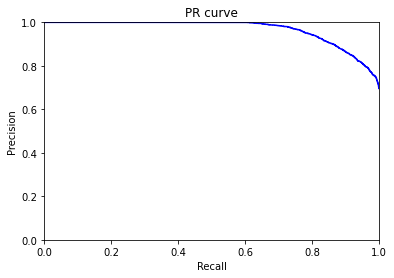

In [39]:
plot_precision_recall_curve(precisions, recalls)

In [40]:
fpr, tpr, _ = roc_curve(Y_test, xgb_model.predict(X_test_ndf))
auc(fpr, tpr)

0.9310989825942644

In [41]:
def plot_roc_curve(fpr, tpr, model, color=None) :
    model = model + ' (auc = %0.3f)' % auc(fpr, tpr)
    plt.plot(fpr, tpr, label=model, color=color)
    plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
    plt.axis([0,1,0,1])
    plt.xlabel('FPR (1 - specificity)')
    plt.ylabel('TPR (recall)')
    plt.title('ROC curve')
    plt.legend(loc="lower right")

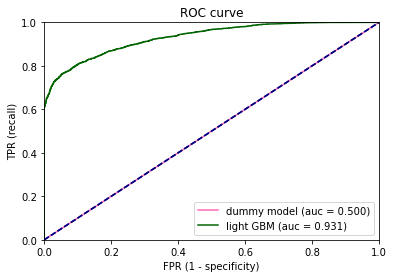

In [42]:
fpr_dummy, tpr_dummy, _ = roc_curve(Y_test, 
                                    dummy.predict_proba(X_test)[:,1])
plot_roc_curve(fpr_dummy, tpr_dummy, 'dummy model', 'hotpink')
fpr_tree, tpr_tree, _ = roc_curve(Y_test, 
                                  xgb_model.predict(X_test_ndf))
plot_roc_curve(fpr_tree, tpr_tree, 'light GBM', 'darkgreen')

In [44]:
human_new = pd.read_csv("work/human_new.csv", encoding="cp949")

# imputer_con = SimpleImputer(strategy="most_frequent")  
# imputer_con.fit(human_new[["노동 계급","직업","모국"]])
# x = imputer_con.transform(human_new[["노동 계급","직업","모국"]])
# human_new[["노동 계급","직업","모국"]] = x

In [45]:
s1=human_new['자본 이득']
s2=human_new['자본 손실']
s=s1+s2
s.rename("순이익",inplace=True)
human_new = pd.concat([human_new,s],axis=1)

In [46]:
human_new['나이대'] = (human_new['나이']/10).astype(int)
human_new['주당 시간별'] = (human_new['주당 시간']/10).astype(int)
human_new['fnlwgt2'] = (human_new['fnlwgt']/10000).astype(int)

In [47]:
working_class = pd.get_dummies(human_new["노동 계급"])
human_new = pd.concat([human_new, working_class], axis=1)
# human_new.drop("노동 계급", axis=1, inplace=True)

human_new[["노동 계급"]] = human_new[["노동 계급"]].apply(lambda x: x.str.lstrip())
human_new[["노동 계급"]] = human_new[["노동 계급"]].apply(lambda x: x.astype('category').cat.codes)

In [48]:
academic_ability = pd.get_dummies(human_new["학력"])
human_new = pd.concat([human_new,academic_ability],axis=1)
# human_new.drop("학력",axis=1,inplace=True)

human_new[["학력"]] = human_new[["학력"]].apply(lambda x: x.str.lstrip())
human_new[["학력"]] = human_new[["학력"]].apply(lambda x: x.astype('category').cat.codes)

In [49]:
marital_status = pd.get_dummies(human_new["혼인 상태"])
human_new = pd.concat([human_new,marital_status], axis=1)
# human_new.drop("혼인 상태", axis=1, inplace=True)

human_new[["혼인 상태"]] = human_new[["혼인 상태"]].apply(lambda x: x.str.lstrip())
human_new[["혼인 상태"]] = human_new[["혼인 상태"]].apply(lambda x: x.astype('category').cat.codes)

In [50]:
jobs = pd.get_dummies(human_new["직업"])
human_new = pd.concat([human_new, jobs], axis=1)
# human_new.drop("직업", axis=1, inplace=True)

human_new[["직업"]] = human_new[["직업"]].apply(lambda x: x.str.lstrip())
human_new[["직업"]] = human_new[["직업"]].apply(lambda x: x.astype('category').cat.codes)

In [51]:
relationship = pd.get_dummies(human_new["관계"])
human_new = pd.concat([human_new, relationship], axis=1)
# human_new.drop("관계", axis=1, inplace=True)

human_new[["관계"]] = human_new[["관계"]].apply(lambda x: x.str.lstrip())
human_new[["관계"]] = human_new[["관계"]].apply(lambda x: x.astype('category').cat.codes)

In [52]:
race = pd.get_dummies(human_new["인종"])
human_new = pd.concat([human_new, race], axis=1)
# human_new.drop("인종", axis=1, inplace=True)

human_new[["인종"]] = human_new[["인종"]].apply(lambda x: x.str.lstrip())
human_new[["인종"]] = human_new[["인종"]].apply(lambda x: x.astype('category').cat.codes)

In [53]:
homeland = pd.get_dummies(human_new["모국"])
human_new = pd.concat([human_new, homeland], axis=1)
# human_new.drop("모국", axis=1, inplace=True)
# human_new[" Holand-Netherlands"]=human_new[" Yugoslavia"]
# human_new.loc[:,[" Holand-Netherlands"]]=0

human_new[["모국"]] = human_new[["모국"]].apply(lambda x: x.str.lstrip())
human_new[["모국"]] = human_new[["모국"]].apply(lambda x: x.astype('category').cat.codes)

In [40]:
human_new.drop(["자본 이득","자본 손실","순이익"],axis=1,inplace=True)

In [52]:
human_new.drop([" 5th-6th"," 7th-8th"," Preschool"," Doctorate"," 9th"," 1st-4th"],axis=1,inplace=True)

In [53]:
human_new_x=human_new.loc[:,['주당 시간','주당 시간별','나이','나이대','fnlwgt','fnlwgt2','교육 수']]

In [54]:
human_new.drop(['주당 시간','주당 시간별','나이','나이대','fnlwgt','fnlwgt2','교육 수'],axis=1,inplace=True)

In [55]:
human_new = pd.concat([human_new,human_new_x],axis=1)

In [54]:
human_new_ndf= xgb.DMatrix(data=human_new.iloc[:, 1:])

In [55]:
human_new_ndf

In [47]:
ndf_predict_proba = xgb_model.predict_proba(human_new.loc[:, '나이':' Yugoslavia'])

AttributeError: 'Booster' object has no attribute 'predict_proba'

In [56]:
ndf_predict = xgb_model.predict(human_new_ndf)

In [46]:
result=np.concatenate([ndf_predict_proba, ndf_predict.reshape(-1,1)], axis=1)

NameError: name 'ndf_predict_proba' is not defined

In [ ]:
ndf_predict_proba_1 = ndf_predict_proba[:,1].reshape(-1,1)

In [243]:
from sklearn.preprocessing import Binarizer
custom_threshold =0.8
binarizer = Binarizer(threshold=custom_threshold).fit(ndf_predict_proba_1)
custom_predict = binarizer.transform(ndf_predict_proba_1)

In [244]:
custom_predict

array([[0.],
       [1.],
       [1.],
       ...,
       [0.],
       [1.],
       [1.]], dtype=float32)

In [57]:
human_new['성별'] = ndf_predict

In [58]:
ndf_rename=human_new[['아이디','성별']]

In [59]:
ndf_rename = ndf_rename.rename(columns={'아이디':'ID', '성별':'SEX'})
ndf_rename.head()

,ID,SEX
0,H00001,0.522501
1,H00002,0.999850
2,H00003,0.999822
3,H00004,0.999738
4,H00005,0.381699


In [60]:
ndf_rename.to_csv('submission_human.csv', encoding='cp949', index=False)

In [61]:
ndf_rename.shape

(16281, 2)

In [48]:
human_train.corr().성별.sort_values(ascending=False)

성별         1.000000
주당 시간별     0.188197
주당 시간      0.184650
인종         0.104376
직업         0.098057
노동 계급      0.079091
나이         0.071077
나이대        0.070148
자본 손실      0.049521
순이익        0.044015
자본 이득      0.041027
fnlwgt     0.017266
fnlwgt2    0.017103
교육 수       0.004579
모국        -0.003905
학력        -0.029241
혼인 상태     -0.084389
관계        -0.591075
Name: 성별, dtype: float64

In [131]:
predict_proba = clf_gs.predict_proba(X_test)
predict = clf_gs.predict(X_test)

In [132]:
result1=np.concatenate([predict_proba, predict.reshape(-1,1)], axis=1)

In [133]:
predict_proba_1 = predict_proba[:,1].reshape(-1,1)

In [140]:
custom_threshold =0.8
binarizer = Binarizer(threshold=custom_threshold).fit(predict_proba_1)
custom_predict = binarizer.transform(predict_proba_1)

In [141]:
get_clf_eval(Y_test, custom_predict)

오차행렬
[[2230  263]
 [ 988 4199]]
정확도: 0.8371, 정밀도: 0.9411, 재현율: 0.8095


In [118]:
a=human_train.corr().성별.sort_values(ascending=False)

In [119]:
human_train['나이'] = (human_train['나이']/10).astype(int)

In [120]:
a=pd.DataFrame({"수치":a})

In [114]:
a.info()

<class 'pandas.core.frame.DataFrame'>
Index: 115 entries, 성별 to 관계
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   수치      115 non-null    float64
dtypes: float64(1)
memory usage: 1.8+ KB


In [113]:
for i,v in enumerate(a['수치']):
    if ((v>-1.0) and (v<1.0)) :
        print(v)

0.5801352648003859
0.43180545811342946
0.23568946222608525
0.2293091490264182
0.22312817750275654
0.13246788820685695
0.10745142628229438
0.10348624694398598
0.10009723650965793
0.09598083475032537
0.09402582601874208
0.08883173120974484
0.08762274910394074
0.08720430156363829
0.08401528263720216
0.08029644294812227
0.06476990040727498
0.05097797284054917
0.048793147111447305
0.048479646868691675
0.045567354678684426
0.036729116751779145
0.03129314968865496
0.03050199157934993
0.02952536095137569
0.026947031230594526
0.0268580452698733
0.026836574562376734
0.026046443254430143
0.02513316234783888
0.016968752680404178
0.013630536608212467
0.012280054339657419
0.011690465756782295
0.011684471462180306
0.011187318018610967
0.010050485108158796
0.00990169337152947
0.008879534658810688
0.008722291556379977
0.00675287184158819
0.005333360649173363
0.005187288259542612
0.0043446299626606006
0.0030875206952258472
0.0022586236466299306
0.0017255605790154084
0.0016226092120311902
0.0014368990593

TypeError: corr() missing 1 required positional argument: 'other'

In [100]:
for i,v in enumerate(a[['1']]):
    #if (v<1) and (v>-1) :
        print(v)

1


In [56]:
human_train['나이'].value_counts()

3    8613
2    8054
4    7175
5    4418
6    2015
1    1657
7     508
8      78
9      43
Name: 나이, dtype: int64

In [53]:
a.value_counts()

3    8613
2    8054
4    7175
5    4418
6    2015
1    1657
7     508
8      78
9      43
Name: 나이, dtype: int64

In [4]:
human_train['나이'].describe()

count    32561.000000
mean        38.581647
std         13.640433
min         17.000000
25%         28.000000
50%         37.000000
75%         48.000000
max         90.000000
Name: 나이, dtype: float64

In [66]:
human_train['fnlwgt'].value_counts()

18     1852
19     1815
17     1758
16     1537
20     1483
       ... 
116       1
148       1
88        1
118       1
95        1
Name: fnlwgt, Length: 99, dtype: int64

In [6]:
human_train.columns

Index(['아이디', '나이', '노동 계급', 'fnlwgt', '학력', '교육 수', '혼인 상태', '직업', '관계', '인종',
       '성별', '자본 이득', '자본 손실', '주당 시간', '모국'],
      dtype='object')

In [7]:
human_train['교육 수'].value_counts()

9     10501
10     7291
13     5355
14     1723
11     1382
7      1175
12     1067
6       933
4       646
15      576
5       514
8       433
16      413
3       333
2       168
1        51
Name: 교육 수, dtype: int64

In [8]:
human_train['자본 이득'].value_counts()

0        29849
15024      347
7688       284
7298       246
99999      159
         ...  
4931         1
1455         1
6097         1
22040        1
1111         1
Name: 자본 이득, Length: 119, dtype: int64

In [9]:
human_train['자본 손실'].value_counts()

0       31042
1902      202
1977      168
1887      159
1848       51
        ...  
1411        1
1539        1
2472        1
1944        1
2201        1
Name: 자본 손실, Length: 92, dtype: int64

In [58]:
human_train['주당 시간'].sort_values()

19750     1
25078     1
11451     1
8447      1
32525     1
         ..
25806    99
30610    99
10143    99
4308     99
1887     99
Name: 주당 시간, Length: 32561, dtype: int64

In [59]:
human_train['주당 시간']

0        40
1        13
2        40
3        40
4        40
         ..
32556    38
32557    40
32558    40
32559    20
32560    40
Name: 주당 시간, Length: 32561, dtype: int64

In [64]:
human_train['fnlwgt'] = (human_train['fnlwgt']/10000).astype(int)

In [ ]:
human_new[["관계"]] = human_new[["관계"]].apply(lambda x: x.str.lstrip())
human_new[["관계"]] = human_new[["관계"]].apply(lambda x: x.astype('category').cat.codes)